<a href="https://colab.research.google.com/github/mohmaed7777/GoDaddy---Microbusiness-Density-Forecasting/blob/main/EDA_with_Polars%3B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c godaddy-microbusiness-density-forecasting

  0% 0.00/1.74M [00:00<?, ?B/s]
100% 1.74M/1.74M [00:00<00:00, 126MB/s]


In [6]:
! unzip godaddy-microbusiness-density-forecasting.zip

Archive:  godaddy-microbusiness-density-forecasting.zip
  inflating: census_starter.csv      
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [7]:
!pip install polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 66.5 MB/s eta 0:00:00


In [8]:
import polars as pl 
import numpy as np
import matplotlib.pyplot as plt 

In [9]:
TRAIN_CSV_PATH = '/content/train.csv'

In [10]:
# Read the DataFrame : 
df = pl.read_csv(TRAIN_CSV_PATH)
df.head()

row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
str,i64,str,str,str,f64,i64
"""1001_2019-08-0...",1001,"""Autauga County...","""Alabama""","""2019-08-01""",3.0076818,1249
"""1001_2019-09-0...",1001,"""Autauga County...","""Alabama""","""2019-09-01""",2.8848701,1198
"""1001_2019-10-0...",1001,"""Autauga County...","""Alabama""","""2019-10-01""",3.0558431,1269
"""1001_2019-11-0...",1001,"""Autauga County...","""Alabama""","""2019-11-01""",2.9932332,1243
"""1001_2019-12-0...",1001,"""Autauga County...","""Alabama""","""2019-12-01""",2.9932332,1243


In [11]:
print('cfips', df['cfips'].n_unique())
print('county', df['county'].n_unique())
print('state', df['state'].n_unique())

cfips 3135
county 1871
state 51


# **Number of counties per state:=**

In [12]:
pl_result = df[['state', 'cfips']]\
.unique(subset=['cfips'])\
.groupby(['state'])\
.count()\
.sort(by='count', reverse=False)

print('columns:', pl_result.columns)

columns: ['state', 'count']


AttributeError: ignored

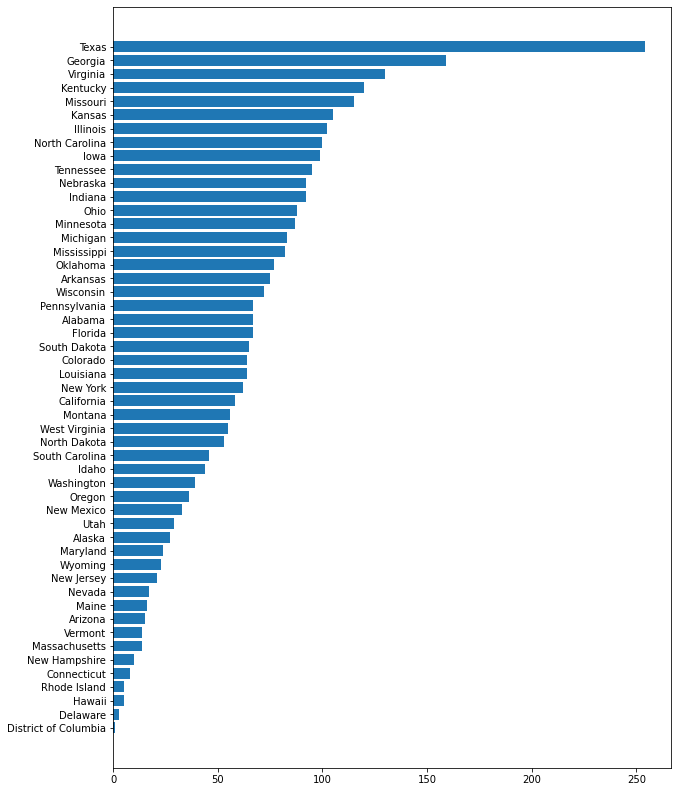

In [13]:
fig, ax = plt.subplots(figsize=(10,14))
bars = ax.barh(pl_result['state'].to_numpy(), pl_result['count'].to_numpy())
ax.bar_label(bars)
ax.set_title('Number of counties per state')
plt.show()